# Assignment 7 - Pandas

Due Oct 19.

In this assignment we will use pandas to examine earthquake data.

Start by importing pandas, numpy and matplotlib.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

I saved you some time by pre-downloading some data in .csv format from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [3]:
url="http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
eqdata=pd.read_csv(url)
print(eqdata.info())
eqdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
time         120108 non-null object
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
id           120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: float64(8), object(7)
memory usage: 13.7+ MB
None


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

Verify that this worked using the `head` and `info` functions.


In [4]:
eqdata = pd.read_csv(url, parse_dates=[0], index_col=11)
print(eqdata.info())
eqdata.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
time         120108 non-null datetime64[ns]
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB
None


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [5]:
print(eqdata.describe())
eqdata.mag.describe()
#The highest and lowest magnitude are 8.2 and -0.97 repectively

            latitude      longitude          depth            mag  \
count  120108.000000  120108.000000  120107.000000  120065.000000   
mean       38.399579     -99.961402      28.375029       1.793958   
std        21.938258      82.996858      62.215416       1.343466   
min       -73.462000    -179.998900      -9.900000      -0.970000   
25%        34.228917    -147.742025       4.100000       0.820000   
50%        38.805300    -120.832000       9.200000       1.400000   
75%        53.889500    -116.068100      22.880000       2.400000   
max        86.651400     179.998000     697.360000       8.200000   

                nst           gap          dmin            rms  
count  59688.000000  94935.000000  85682.000000  119716.000000  
mean      17.878284    124.048978      0.893198       0.358174  
std       14.911369     68.518595      2.903966       0.364046  
min        0.000000      9.000000      0.000000       0.000000  
25%        8.000000     74.000000      0.020760      

count    120065.000000
mean          1.793958
std           1.343466
min          -0.970000
25%           0.820000
50%           1.400000
75%           2.400000
max           8.200000
Name: mag, dtype: float64

### 4) Use `sort_values` to get the top 20 earthquakes by magnitude

In [6]:
eqdata.sort_values('mag', ascending=False).head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The country information seems to be in there. How would you get it out?

### 5) Extract the country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe. (Is it really just country? No, some rows have the name of a US state.)

In [7]:
eqdata['country'] = eqdata['place'].str.split(',').str.get(1)
eqdata.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


### 6) Find the 10 states / countries with the highest _number_ of earthquakes

In [8]:
eqdata['country'].value_counts()[1:11,]

 Alaska              33589
 Oregon               3195
 Nevada               2858
 Washington           2784
 Hawaii               2564
 Puerto Rico          2284
 Indonesia            2120
 Oklahoma             1992
 Montana              1991
 Papua New Guinea     1356
Name: country, dtype: int64

### 7) Find the top 10 states / countries where the strongest and weakest earthquakes occured

In [9]:
#10 states/countries with weakest earthquakes occured
eqdata.groupby(['country']).min().sort_values('mag',ascending=True).head(10) 

#10 states/countries with strongest earthquakes occured
eqdata.groupby(['country']).max().sort_values('mag',ascending=False).head(10)

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,updated,place,type
country,,,,,,,,,,,,,
Chile,2014-12-31 05:19:19.650,-17.651400,-67.0527,257.70,8.2,NaN,221.000000,8.625,3.88,us,2015-07-30T16:24:51.223Z,"offshore Atacama, Chile",earthquake
Alaska,2014-12-31 23:16:55.000,71.140400,179.9980,281.10,7.9,152.0,356.399971,7.712,7.57,us,2015-07-16T20:04:24.343Z,"Unimak Island region, Alaska",earthquake
Solomon Islands,2014-12-30 23:27:00.330,-6.587500,167.7877,398.14,7.6,NaN,272.000000,32.086,1.50,us,2015-08-13T19:29:13.018Z,"99km SSW of Kirakira, Solomon Islands",earthquake
Papua New Guinea,2014-12-31 15:33:40.550,0.539100,155.8238,489.84,7.5,NaN,320.000000,23.815,1.62,us,2015-04-18T21:54:18.633Z,"eastern New Guinea region, Papua New Guinea",earthquake
El Salvador,2014-12-30 22:03:07.000,14.088000,-88.0182,221.41,7.3,NaN,240.000000,2.056,2.61,us,2015-08-13T19:35:02.679Z,"99km SW of Puerto El Triunfo, El Salvador",earthquake
Mexico,2014-12-29 23:08:52.200,32.666333,-90.9440,233.19,7.2,41.0,331.200000,9.780,2.99,us,2015-08-13T19:30:39.599Z,"offshore Guerrero, Mexico",quarry blast
Fiji,2014-12-31 21:17:04.370,-15.264700,179.9310,697.36,7.1,NaN,320.000000,38.421,1.45,us,2015-03-17T02:38:30.040Z,"9km SE of Ndoi Island, Fiji",earthquake
Indonesia,2014-12-30 16:43:16.510,7.003800,140.9058,609.96,7.1,NaN,287.000000,19.164,1.89,us,2015-03-20T18:42:40.577Z,"south of Java, Indonesia",earthquake
Greece,2014-12-31 16:41:17.710,40.780000,28.5588,184.33,6.9,NaN,226.000000,5.416,2.40,us,2015-03-17T02:38:28.040Z,"9km WSW of Lixourion, Greece",earthquake


It looks like US states are being treated differently from foreign countries. We would like to fix that.

How can we tell if a name is a US state name? Python has a package for that: https://pypi.python.org/pypi/us!

This is a good time to try installing a new package using `pip`. Pip is the original python package manager that predates `conda`. Basically `conda` is more oriented towards data science while `pip` is more general purpose. There are lots more packages on `pip` than on `conda`. You can read a [comparision](https://www.quora.com/What-is-the-comparison-among-conda-vs-pip-vs-anaconda) of these two utilities if you want to know more.

### 8) Install the `us` package using pip, either directly from the notebook or the command line

The shell command is `pip install us`.

In [10]:
!pip install us

### 9) Import the `us` package to verify your installation works

In [11]:
import us

### 10) Read the [`us` documentation](https://pypi.python.org/pypi/us) to figure out how to create a list of state names (all upper case)

In [12]:
states=pd.DataFrame(data=us.states.STATES)
capitalize_state=[x.upper() for x in states[0].astype(str)]
#capitalize_state

### 11) Write a function to check whether a string is a US state name.
This function should not be case sensitive. It should also strip any whitespace out of the test string.

In [13]:
def check_state(string):
    r=string.strip().upper() in capitalize_state    
    return r

### 12) Use Pandas' [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) function to apply this to each row of the country name series

You should produce a new boolean series. (Hint: use `dropna()` to drop rows that have null values before calling apply.)

In [14]:
#new_eqdata=eqdata.region.dropna(axis=0)
new_eqdata=eqdata['country'].dropna(axis=0)

#boolean series that for decide NaN value in country
index_US=new_eqdata.apply(check_state)
#in_US=pd.DataFrame(index_US)
#index_nan

### 13) reindex this boolean series to match the dataframe's index
Fill the null values with `False` using `.fillna()`.

In [15]:
eqdata['state_in_US']=index_US
eqdata['country'].fillna(value='False')
eqdata.head()
        

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country,state_in_US
id,,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska,True
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada,True
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska,True
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska,True
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico,False


### 14) Now re-assign the country column in the DataFrame to `USA` if the row is a state.
Also add the state name as a new column.

In [16]:
eqdata['US_states']=np.NaN
eqdata.US_states[eqdata.state_in_US==True]=eqdata.country
eqdata.country[eqdata.state_in_US==True]='USA'
eqdata

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country,state_in_US,US_states
id,,,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.200,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,USA,True,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.000,1.33,ml,4.0,171.430000,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,USA,True,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.100,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,USA,True,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.500,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,USA,True,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.590,1.34,ml,6.0,285.000000,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico,False,NaN
ci11419722,2014-01-31 23:30:36.930,32.567667,-117.013500,0.010,1.51,ml,16.0,264.000000,0.080810,0.2100,ci,2014-02-01T00:09:04.470Z,"3km N of Tijuana, Mexico",quarry blast,Mexico,False,NaN
ci11419714,2014-01-31 23:28:04.020,33.359000,-116.360500,12.980,1.17,ml,26.0,163.000000,0.032660,0.1200,ci,2014-02-01T00:54:07.630Z,"11km N of Borrego Springs, California",earthquake,USA,True,California
ak11151127,2014-01-31 23:22:52.000,62.800200,-150.696500,86.400,1.50,ml,NaN,NaN,NaN,0.4700,ak,2014-01-31T23:33:23.190Z,"61km NNW of Talkeetna, Alaska",earthquake,USA,True,Alaska
ak11151125,2014-01-31 23:20:42.000,58.169500,-151.992400,50.100,2.10,ml,NaN,NaN,NaN,0.3700,ak,2014-01-31T23:25:57.118Z,"48km NNE of Kodiak, Alaska",earthquake,USA,True,Alaska


### 15) Now redo the country count and minimum magnitdue using the corrected data

In [24]:
#count country in total 163 countries
#eqdata.groupby(eqdata.country)['country'].count()
eqdata.country.value_counts()
#minimum magnitude
eqdata.groupby(['country']).min().sort_values('mag',ascending=True).head(10) 

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,updated,place,type,state_in_US,US_states
country,,,,,,,,,,,,,,,
USA,2014-01-01 00:05:55.000,17.4758,-179.997000,-9.9,-0.97,0.0,13.000000,0.000000,0.00,ak,2014-01-01T00:38:24.983Z,"0km E of Aromas, California",acoustic noise,True,Alabama
Canada,2014-01-01 18:33:32.900,43.5065,-142.671400,0.0,-0.10,3.0,18.000000,0.035933,0.00,ak,2014-01-02T15:43:50.145Z,"0km E of Princeton, Canada",anthropogenic event,False,NaN
Sierra Leone,2014-12-02 06:20:01.000,6.0096,-12.716600,6.0,0.00,18.0,86.399993,0.179663,0.00,mb,2015-02-27T21:38:43.541Z,"169km S of Bonthe, Sierra Leone",earthquake,False,NaN
CA,2014-01-03 20:30:24.900,35.4310,-122.484800,0.0,0.00,0.0,36.000000,0.008983,0.01,nc,2014-01-10T00:13:25.992Z,"0km E of Quarry near Atascadero, CA",quarry,False,NaN
Aleutian Islands,2014-05-19 01:43:25.000,50.3656,-179.971700,0.0,0.20,4.0,158.399987,0.077255,0.02,ak,2014-05-24T00:13:23.770Z,"Andreanof Islands, Aleutian Islands, Alaska",earthquake,False,NaN
Puerto Rico,2014-01-01 09:27:19.300,17.2150,-68.058900,0.0,0.30,3.0,21.000000,0.002695,0.00,pr,2014-01-01T15:58:28.101Z,"0km ESE of Indios, Puerto Rico",earthquake,False,NaN
Mexico,2014-01-01 16:07:36.990,13.6330,-117.735667,0.0,0.96,3.0,43.000000,0.005004,0.02,ci,2014-01-02T16:17:22.689Z,"100km SE of San Felipe, Mexico",earthquake,False,NaN
,2014-01-01 10:55:27.410,-57.6948,-143.642300,0.0,1.20,9.0,21.000000,0.470000,0.04,ak,2014-01-16T22:26:00.272Z,"100km E of Visokoi Island,",earthquake,False,NaN
U.S. Virgin Islands,2014-01-02 03:45:06.000,17.9165,-65.254700,2.0,1.50,2.0,97.200000,0.008983,0.01,pr,2014-01-15T11:40:38.362Z,"101km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,False,NaN


### 16) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [25]:
eqdata_filtered = eqdata.query('mag>4')

### 17) Analyze the distribution of the Earthquake magnitudes in the filtered distribution

Make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?

fig, ax = plt.subplots()
df_filt.hist('mag', bins=20, ax=ax)
ax.set_yscale('log')

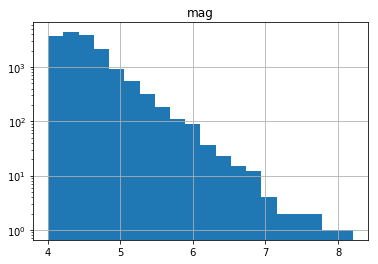

In [38]:
fig, ax = plt.subplots() 
eqdata_filtered.hist('mag', bins=20, ax=ax) 
ax.set_yscale('log')

### 18) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

Use the filtered data. Color it by magnitude. Make it pretty

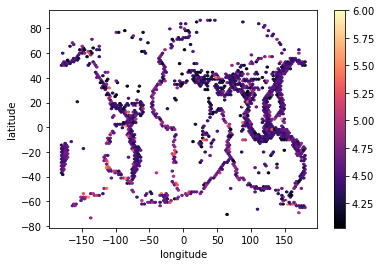

In [33]:
eqdata_filtered.plot.hexbin('longitude', 'latitude', C='mag',sharex=False, cmap='magma')

### 19) Do the same for depth

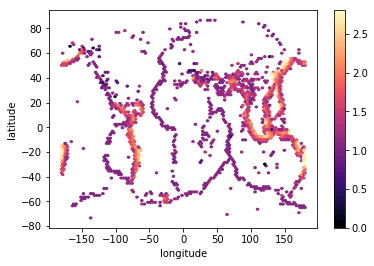

In [36]:
#since the depth has large ranges, I  take log to show the color
eqdata_filtered.plot.hexbin('longitude', 'latitude', C='depth',sharex=False, bins='log',cmap='magma')